## Bike Rental - Multiple Linear Regression Model Assignment 

###  1. Business Objective & Problem Statement

__Business Objective:__
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

__Goal:__
Company want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

   Which variables are significant in predicting the demand for shared bikes.
   How well those variables describe the bike demands
   
__Problem Statement:__
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### 2. Importing Required Libraries

In [1]:
# Importing required library

import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 500)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

__Dataset characteristics__

day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


```

### 3. Data Review - Uderstanding Data

In [2]:
BikeRental = pd.DataFrame(pd.read_csv("./data/day.csv"))

In [3]:
BikeRental.shape

(730, 16)

In [4]:
BikeRental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
BikeRental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#check the columns of data
BikeRental.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

__Data Observations__
1. Dataset has 730 rows and 16 columns 
2. four columns are float type, one is date time type and other are integer type.


In [7]:
#details of numeric data
BikeRental.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# datatypes of data
BikeRental.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### 4. Data Cleaning 

1. Checking missing/null values
2. drop the column, if there are not useful 
3. data preparation: converting column to categorical variable
4. Univariate analysis
5. Handling outliers
6. EDA
7. corelation analysis 

#### 4.1 Checking missing/null values

In [9]:
#check the Null value 
round(BikeRental.isnull().sum()/len(BikeRental)*100,2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

__Observation:__ no column has null values.

#### 4.2 drop a coulmn, if its not useful 

In [10]:
#instant column has only index value. lets drop this.
BikeRental = BikeRental.drop(columns=['instant'])

In [11]:
BikeRental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


`casual` and `registered` variables: Since the goal is to predict the total count. We can drop these variables.

In [12]:
BikeRental = BikeRental.drop(columns=['casual'])
BikeRental = BikeRental.drop(columns=['registered'])

#### 4.3 Data Preparation: converting column to categorical type

`dteday` column has date. Since we already have month and year column in dataset. lets extract the date and rename column to date

In [13]:
#drived column: "date" extract date and rename it to date 
BikeRental['dteday'] =BikeRental['dteday'].apply(lambda x: int(x.split('-')[0]))
BikeRental = BikeRental.rename(columns={"dteday": "date"})

__Data Preparation:__
From Problem statement these data preparation steps are mentioned:
- convert variables `weathersit` and `season` to specific string values as mentioned in data dictionary.
- dont drop yr column.

In [14]:
# weathersit variable
BikeRental.weathersit.describe()

count    730.000000
mean       1.394521
std        0.544807
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: weathersit, dtype: float64

`weathersit` variable from data dictionary:
  
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
        
  In column, mapping will be like
    1 clear
    2 mist
    3 light
    4 heavy

In [15]:
BikeRental['weathersit'] = BikeRental['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light', 4: 'heavy'})

In [16]:
# season variable
BikeRental.season.describe()

count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

`season` variable from data dictionary can be represented as categorical variable
```
1: spring
2: summer 
3: fall
4: winter
```

In [17]:
BikeRental['season'] = BikeRental['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [18]:
#converting weekday column
BikeRental['weekday']=BikeRental['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

In [19]:
# converting month column
BikeRental['mnth']=BikeRental['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [20]:
BikeRental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        730 non-null    int64  
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 74.3+ KB


In [21]:
BikeRental.shape

(730, 13)

After data cleaning, data set has 13 columns and 730 rows

#### 4.6 EDA

##### 4.6.1 Numerical Columns Analysis

In [22]:
BikeRental_numeric_cols=['temp', 'atemp', 'hum', 'windspeed', 'cnt']

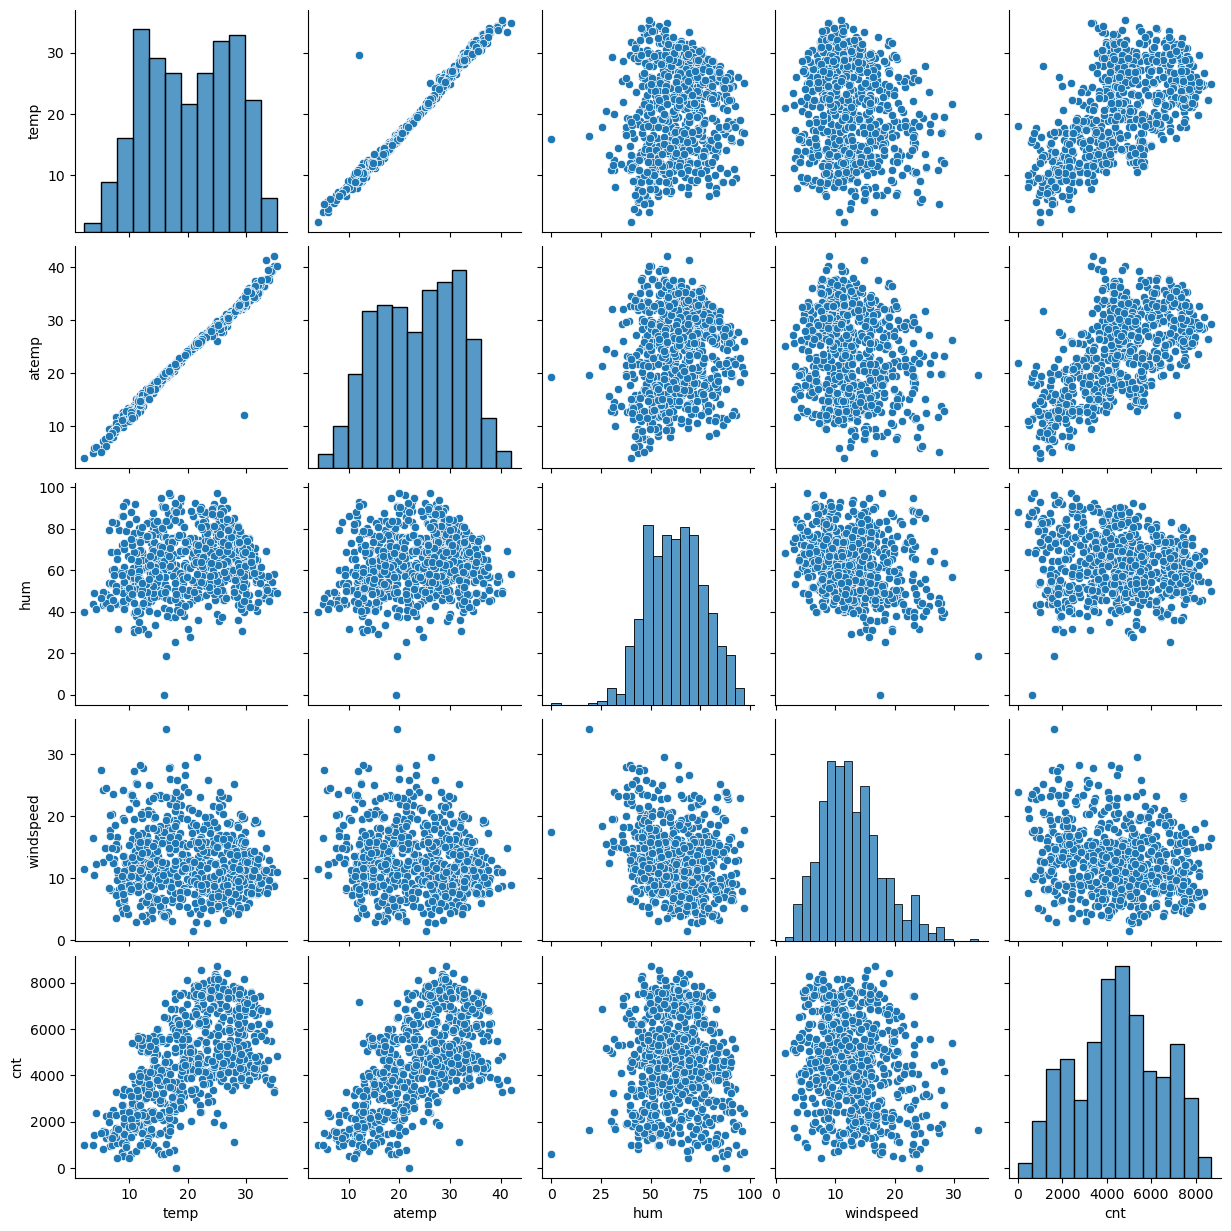

In [23]:
sns.pairplot(BikeRental, vars=BikeRental_numeric_cols)
plt.show()

__Observations__
1. `temp` and `atemp` variable have correlation with `cnt` target variable.
2. `temp` and `atemp` variable are also highly correlated.

##### 4.6.2 Categorical Columns Analysis

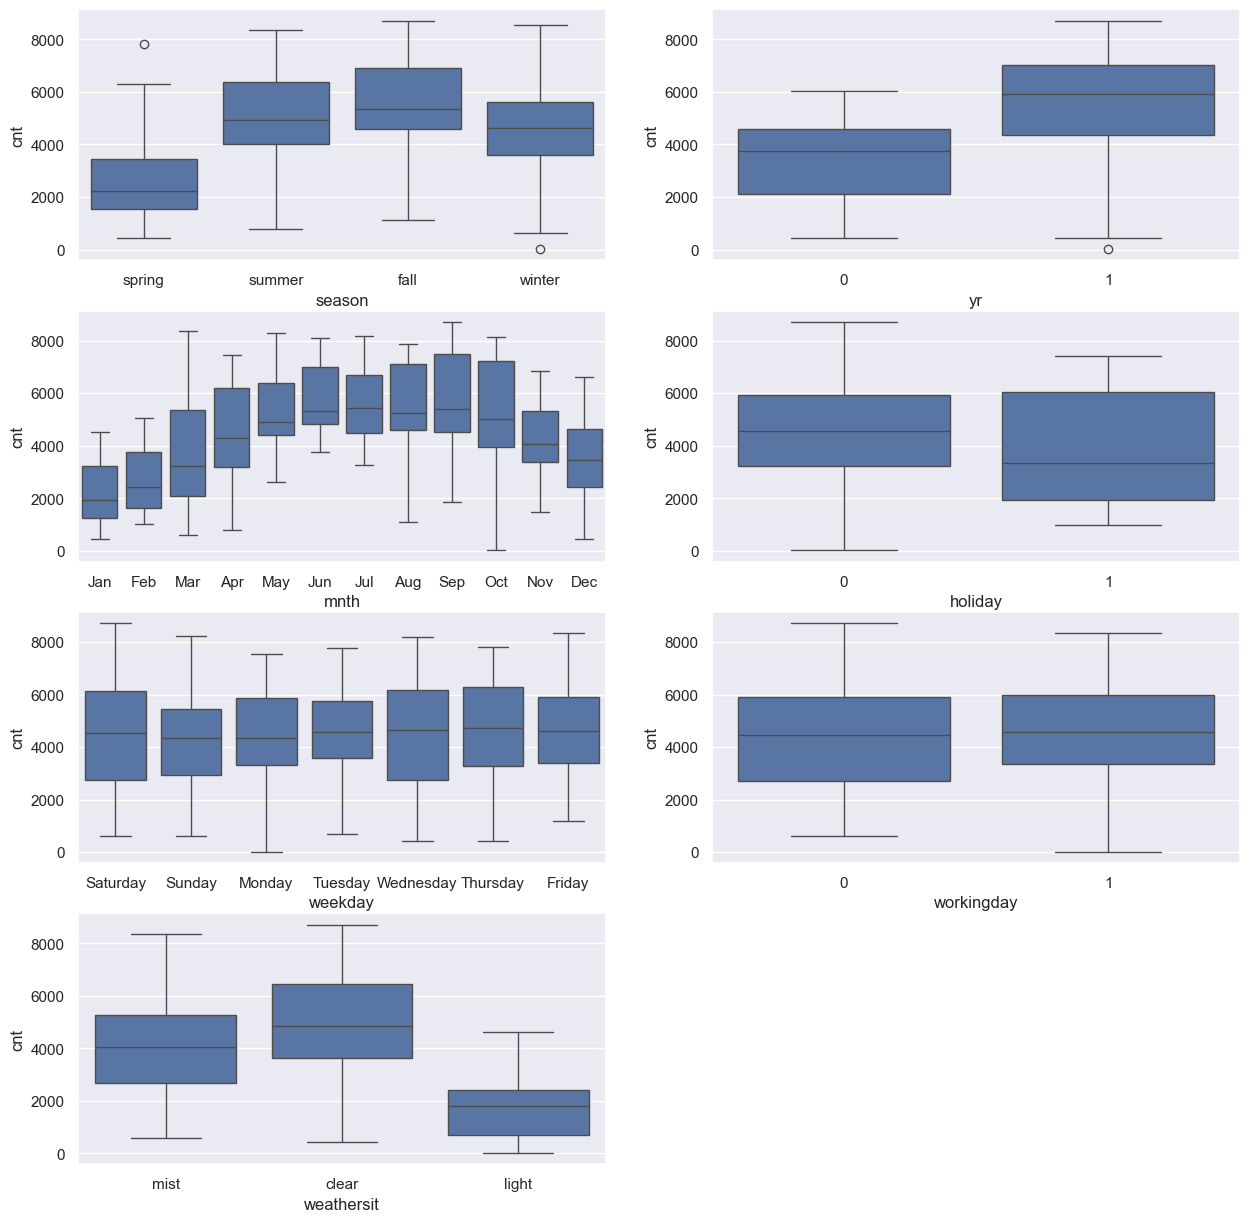

In [24]:
# Boxplot of categorical variables
bike_cat_col = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
sns.set_theme(style="darkgrid")
i=1
for rfe_cols in bike_cat_col:
    plt.subplot(4,2,i)
    sns.boxplot(data=BikeRental, x=rfe_cols, y='cnt')
    i=i+1
plt.show()

__Observations:__
1. season: Fall season has the highest demand.
2. year: bike demand has increased from 2018 to 2019.
3. month: bike demand increases from Jan to Jul and after that demand start dropping and Dec month has least bike demand.
4. weekday: there is no particular pattern. 
5. working day: on workingday, bike demand is little high. 
6. weathersit: when weathersit is clear, bike demand is high.
7. Thursday, Friday, Saturday have more bookings when compared to the start of the week.

##### 4.6.3 Correlation Analysis

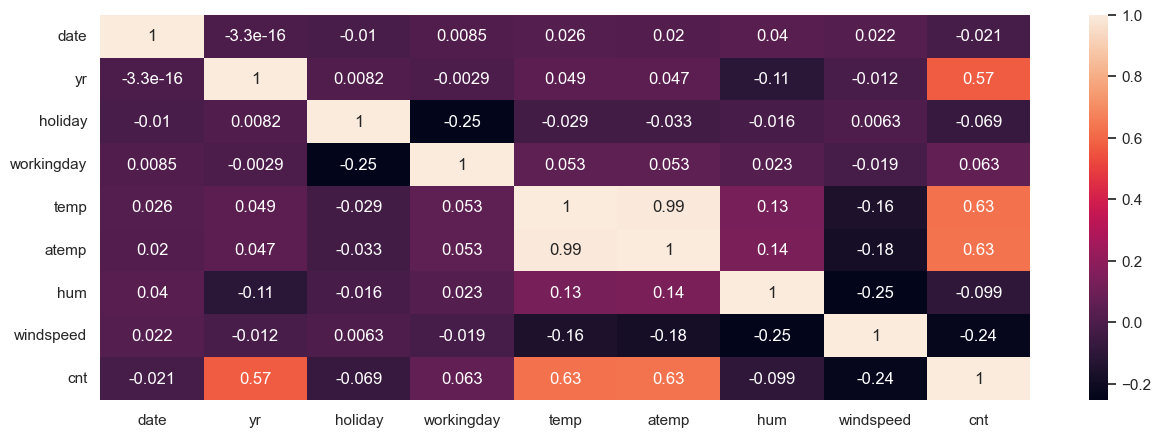

In [25]:
BikeRental.head()
cor=BikeRental.corr(numeric_only=True)
plt.figure(figsize=(15,5))
sns.heatmap(cor, annot = True)
plt.show()

**Observation:** temp and atemp has the highest correlation. 

In [26]:
BikeRental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        730 non-null    int64  
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 74.3+ KB


##### 4.6.4 Visualising the Data

In [27]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column, y='cnt',data=BikeRental)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',data=BikeRental, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

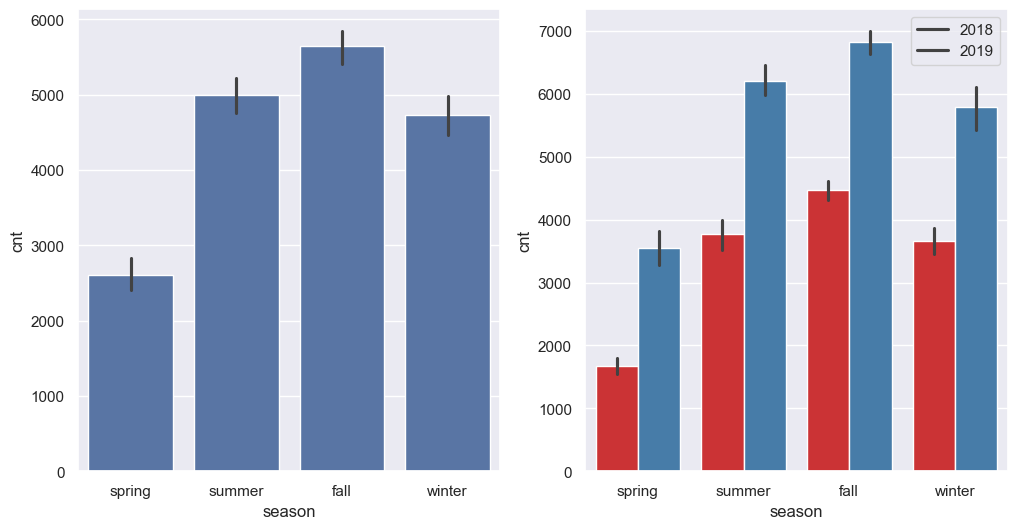

In [28]:
# plotting visualization for season column

plot_cat_columns('season')

Fall season seems to have more bookings, followed by summer and in each season the booking count has increased from 2018 to 2019.

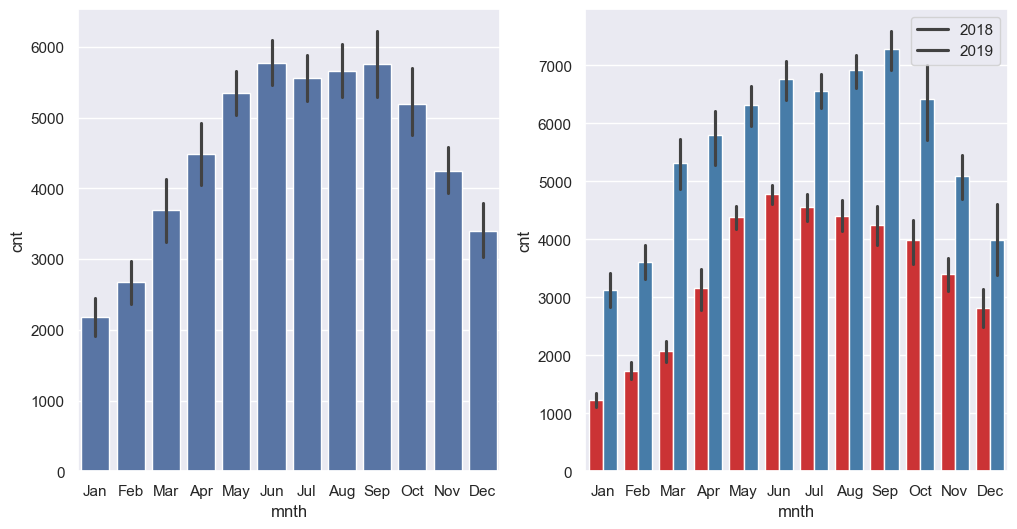

In [29]:
# plotting visualization for month column
plot_cat_columns('mnth')

Most of the bookings has been done during the month of May, June, July, Aug, Sep and Oct. Trend increased starting of the year till mid of the year and then it started decreasing as it approached the end of year.
Number of bookings for each month seems to have increased from 2018 to 2019.

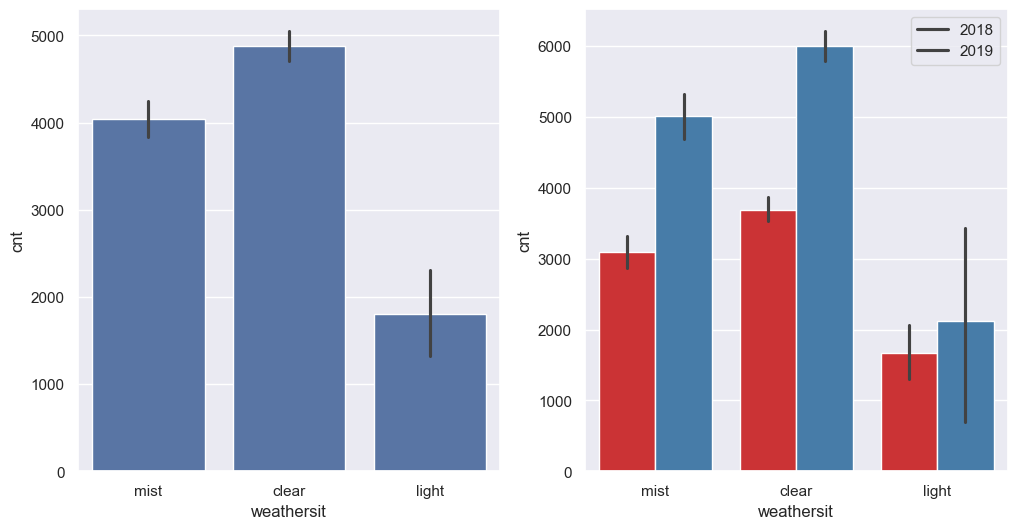

In [30]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

Clear weather attracted more booking which seems obvious. In comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

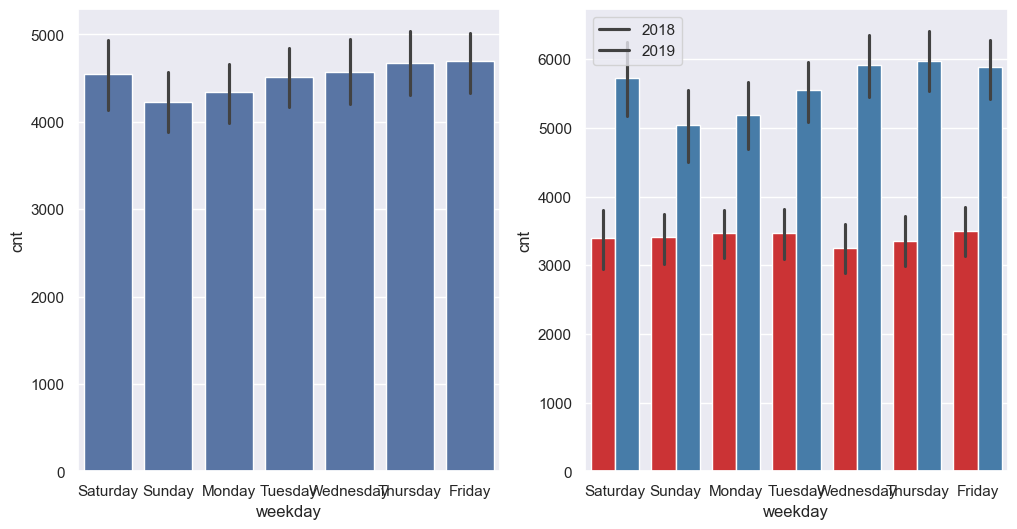

In [31]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.

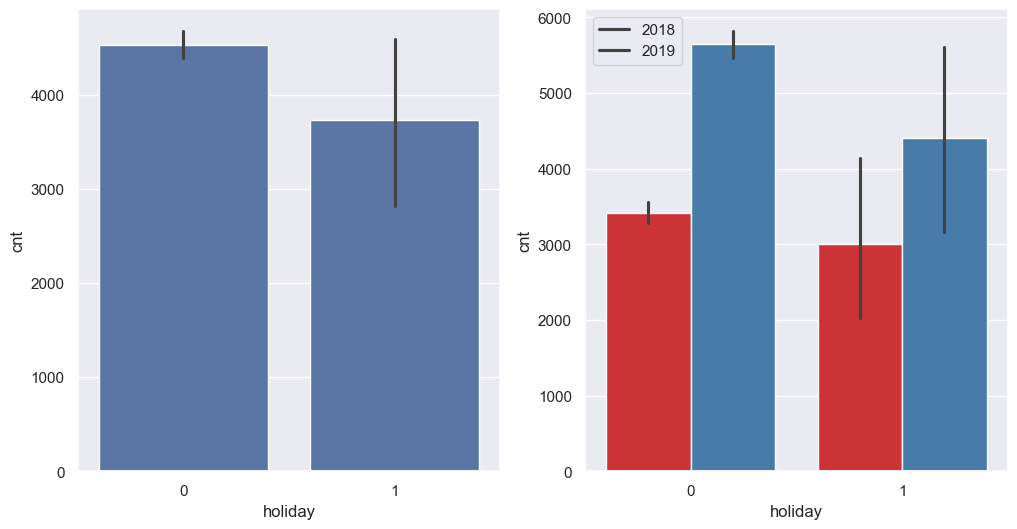

In [32]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

When its holiday, booking seems to be less in number which makes sense.

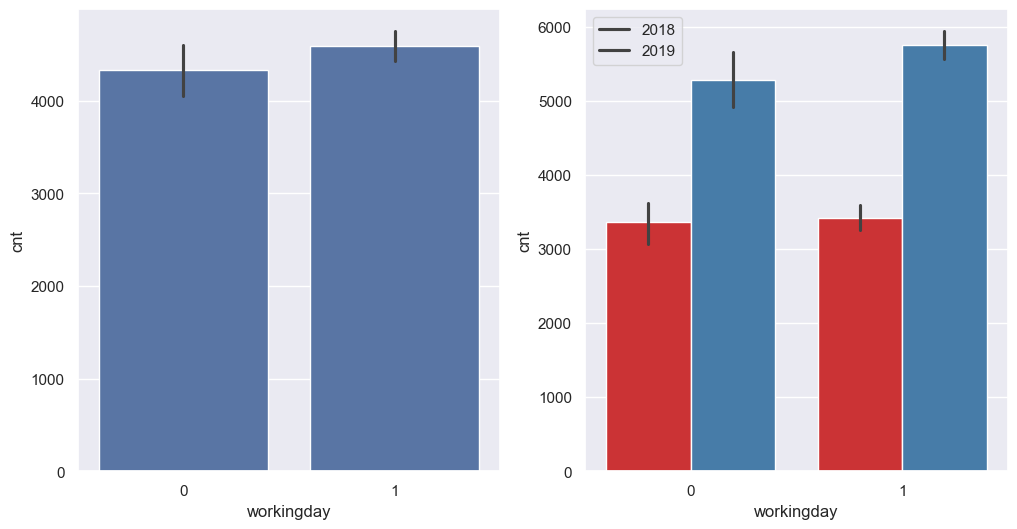

In [33]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

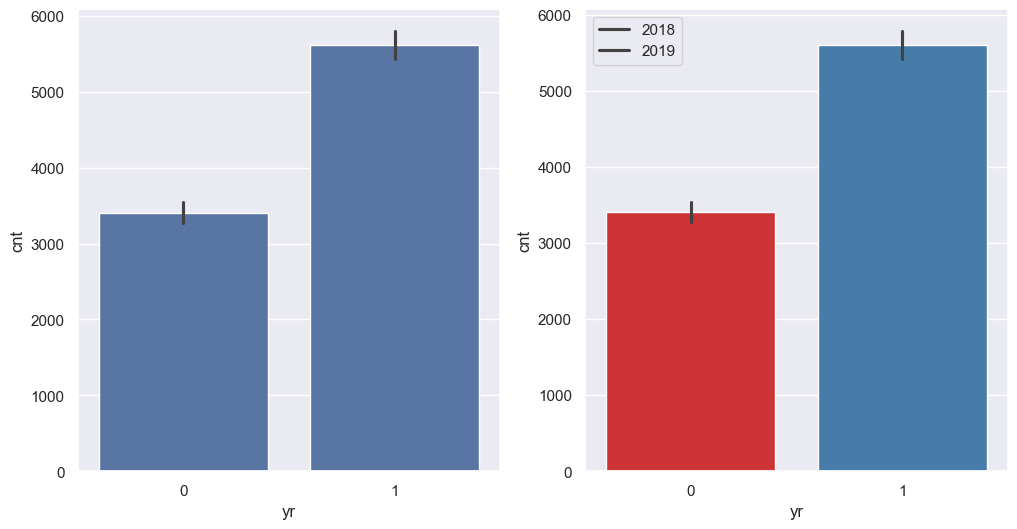

In [34]:
# plotting visualization for year column

plot_cat_columns('yr')

2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

There is a linear relationship between `temp` and `atemp`. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

### 5. Linear Regression data preparation

Linear Regression data preparation:
1. create dummy variables
2. train and test split 
3. variable scaling normalization
4. define target column and feature columns

#### 5.1 create dummy variables

In [35]:
# creating dummy variable for categorical variable:
category_cols = ['mnth', 'season', 'weekday', 'weathersit']
dummy_cols = pd.get_dummies(BikeRental[category_cols], drop_first=True)
dummy_cols.head(10)

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,season_spring,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light,weathersit_mist
0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True
1,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True
2,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
5,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
6,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
7,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True
8,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
9,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False


In [36]:
#  concatenate  it with dataset 
BikeRental_new = pd.concat([BikeRental, dummy_cols], axis=1)
BikeRental_new = BikeRental_new.drop(columns=category_cols)

In [37]:
BikeRental_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               730 non-null    int64  
 1   yr                 730 non-null    int64  
 2   holiday            730 non-null    int64  
 3   workingday         730 non-null    int64  
 4   temp               730 non-null    float64
 5   atemp              730 non-null    float64
 6   hum                730 non-null    float64
 7   windspeed          730 non-null    float64
 8   cnt                730 non-null    int64  
 9   mnth_Aug           730 non-null    bool   
 10  mnth_Dec           730 non-null    bool   
 11  mnth_Feb           730 non-null    bool   
 12  mnth_Jan           730 non-null    bool   
 13  mnth_Jul           730 non-null    bool   
 14  mnth_Jun           730 non-null    bool   
 15  mnth_Mar           730 non-null    bool   
 16  mnth_May           730 non

#### 5.2 train and test split

In [38]:
#Train Test split of dataset in 70:30 ratio
df_train, df_test = train_test_split(BikeRental_new, test_size=0.3, random_state=100)

In [39]:
print("shape of traing data", df_train.shape)
print("shape of test data", df_test.shape)

shape of traing data (511, 31)
shape of test data (219, 31)


#### 5.3 feature scaling and normalization

In [40]:
scaler = MinMaxScaler()

In [41]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
numeric_cols = ['temp','atemp','hum','windspeed','cnt']

df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])

In [42]:
#Inspect stats fro Training set after scaling
df_train.describe()

,date,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,15.592955,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844,0.514186
std,8.903110,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639,0.224737
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.356765
50%,16.000000,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.519673
75%,23.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.688737
max,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
df_train.head()

,date,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,season_spring,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light,weathersit_mist
653,16,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False
576,31,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
426,3,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True
728,30,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
482,28,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True


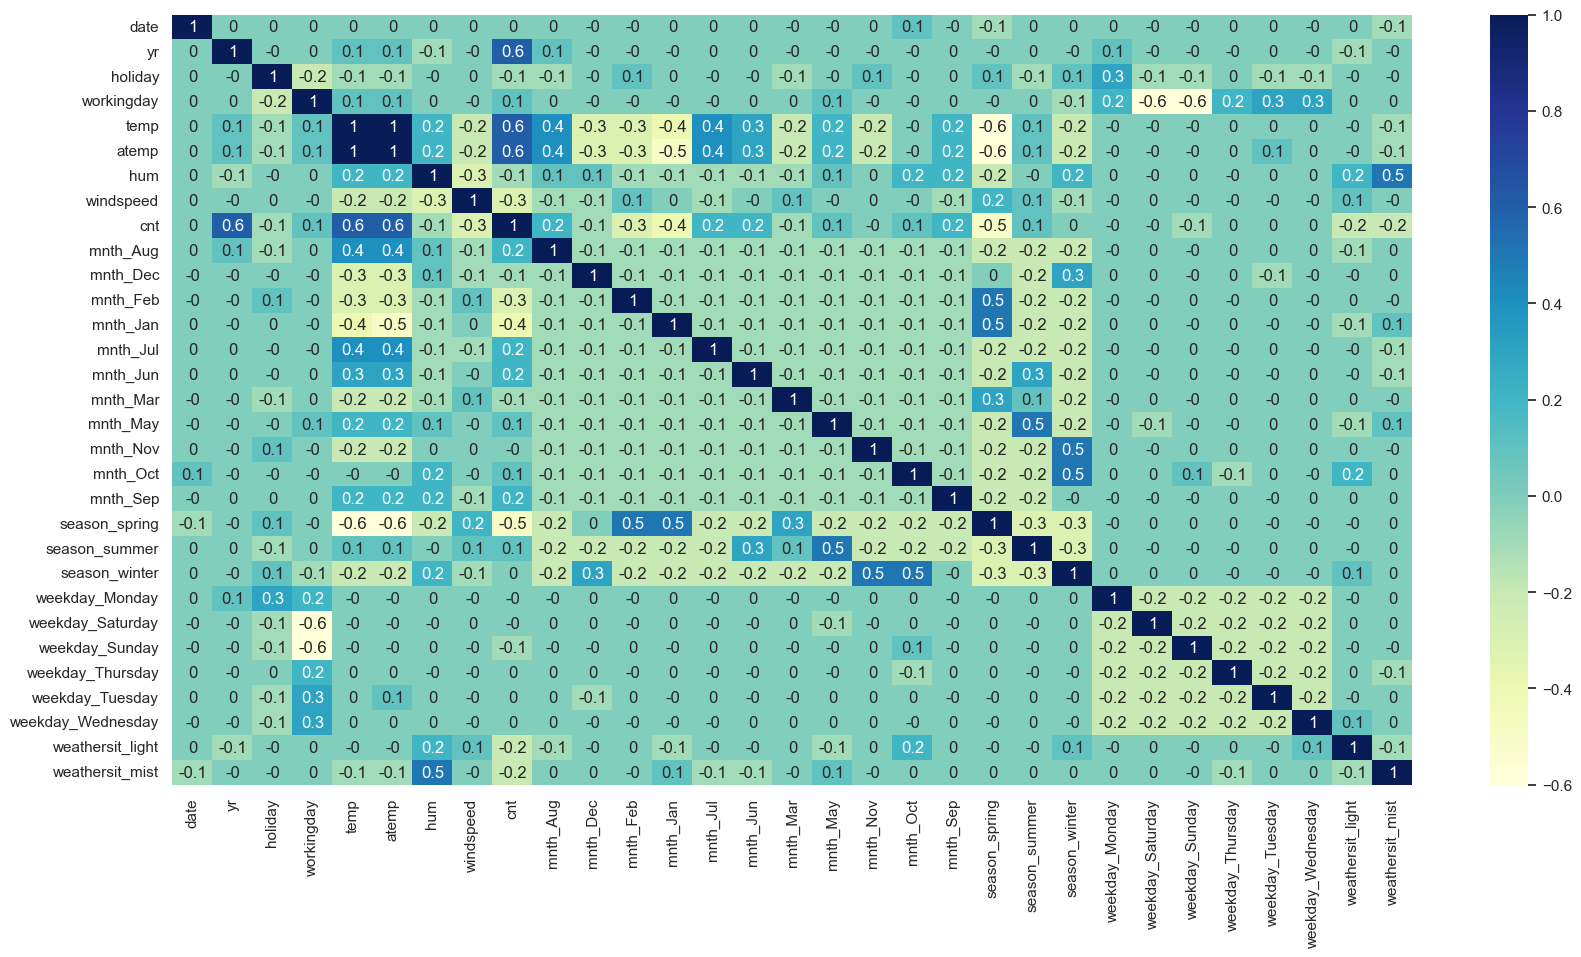

In [44]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 10))
sns.heatmap(round(df_train.corr(), 1), annot=True, cmap="YlGnBu")
plt.show()

Observations: from this correlation table, temp and atemp are highly correlated.

#### 5.4 define target column and feature columns

In [45]:
y_train = df_train.pop('cnt')
X_train = df_train

### 6. Iterative model process

1. RFE: build linear regression model for RFE using sklearn
2. build a model using selected features 

#### 6.1 RFE: Build linear regression model for RFE using sklearn

In [46]:
# a Linear Regression model for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [47]:
#Selecting 15 features using automated approach
rfe = RFE(lr, n_features_to_select=15)
rfe=rfe.fit(X_train, y_train)

In [48]:
rfe_df = pd.DataFrame({'feature': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,feature,Select Status,Ranking
29,weathersit_mist,True,1
21,season_winter,True,1
20,season_summer,True,1
19,season_spring,True,1
18,mnth_Sep,True,1
24,weekday_Sunday,True,1
28,weathersit_light,True,1
12,mnth_Jul,True,1
23,weekday_Saturday,True,1
7,windspeed,True,1


__Observation:__
RFE method has selected top 15 features. we will start building model with these features but will also use manual buildings method to find the best performing model.
  

In [49]:
# selecting the selected variable via RFE in col list
rfe_supp_cols = X_train.columns[rfe.support_]
print(rfe_supp_cols)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'mnth_Jul',
       'mnth_Sep', 'season_spring', 'season_summer', 'season_winter',
       'weekday_Saturday', 'weekday_Sunday', 'weathersit_light',
       'weathersit_mist'],
      dtype='object')


In [50]:
# checking which columns has been rejected by RFE
X_train.columns[~rfe.support_]

Index(['date', 'atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Monday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

#### 6.2 Build the Linear Regression Model  

##### 6.2.1 Model 1: Model with features selected by Recursive Feature Elimination (RFE)

In [51]:
#VIF function 
def print_vif(cols):
    df1 = X_train[cols]
    vif_df = pd.DataFrame()
    vif_df['Features'] = df1.columns
    vif_df['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'],2)
    #return vif_df
    print(vif_df.sort_values(by='VIF',ascending=False))

In [52]:
rfe_cols = X_train.columns[rfe.support_]
X_train = X_train * 1
#print(col.dtype)
X_train_rfe = X_train[rfe_cols]
X_train_sm = sm.add_constant(X_train_rfe)
X_train_sm = X_train_sm * 1
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print("*******************************************")
print_vif(rfe_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.2
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          7.31e-192
Time:                        00:01:40   Log-Likelihood:                 518.04
No. Observations:                 511   AIC:                            -1006.
Df Residuals:                     496   BIC:                            -942.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1992      0.028  

Observation:
    R-squared:0.84
    P value of const is high means line pass through (0,0).
    P value of holiday, workingday, weekday_Saturday and weekday_Sunday is high 0.254.
    From VIF table, workingday has highest VIF.
    So, in next model remove workingday

##### 6.2.2 Model 2: Model with features selected by RFE and removing `workingday`

In [53]:
rfe_cols = rfe_cols.drop(['workingday'])
X_train_rfe = X_train[rfe_cols]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print("*******************************************")
print_vif(rfe_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.2
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          7.31e-192
Time:                        00:01:40   Log-Likelihood:                 518.04
No. Observations:                 511   AIC:                            -1006.
Df Residuals:                     496   BIC:                            -942.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2832      0.034  

__Observations:__
- R-squared: 0.84
- P value of `weekday_Saturday` is high 0.39.
So, in next model remove `weekday_Saturday`

##### 6.2.3 Model 3: Model with Model 2 features and removing `weekday_Saturday`

In [54]:
rfe_cols = rfe_cols.drop(['weekday_Saturday'])
X_train_rfe = X_train[rfe_cols]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print("*******************************************")
print_vif(rfe_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     211.4
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          7.13e-193
Time:                        00:01:40   Log-Likelihood:                 517.66
No. Observations:                 511   AIC:                            -1007.
Df Residuals:                     497   BIC:                            -948.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2857      0.034  

__Observations:__
- R-squared: 0.847
- P value of all variable is less than 0.05. so now check the VIF table. `hum` variable has very high VIF of 20.25
So, in next model remove `hum`

##### 6.2.4 Model 4: Model with Model 3 features and dropping `hum`

In [55]:
rfe_cols = rfe_cols.drop(['hum'])
X_train_rfe = X_train[rfe_cols]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print("*******************************************")
print_vif(rfe_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.5
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          5.26e-190
Time:                        00:01:40   Log-Likelihood:                 508.04
No. Observations:                 511   AIC:                            -990.1
Df Residuals:                     498   BIC:                            -935.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2055      0.029  

__Observations:__
- R-squared: 0.841
- from the VIF table. `temp` variable has VIF of 5.15. 
So, in next model remove `temp`

##### 6.2.5 Model 5: Model with Model 4 features and dropping `temp`

In [56]:
rfe_cols = rfe_cols.drop(['temp'])
X_train_rfe = X_train[rfe_cols]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print("*******************************************")
print_vif(rfe_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     151.0
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          6.15e-151
Time:                        00:01:40   Log-Likelihood:                 412.67
No. Observations:                 511   AIC:                            -801.3
Df Residuals:                     499   BIC:                            -750.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5901      0.017  

__Observations:__
1. There is significant drop in adjusted R-squared value from 0.83 to 0.76.
2. It means, we should not remove this temp variable. lets add temp variable to list
3. from the VIF table of model 4. temp variable has VIF of 5.05. But from the summary, we can still see some of variable have a high p-value. for instance, `mnth_Jul` has a p-value of 0.648. We should drop this variable as well.

So, in next model add `temp` variable back and remove `mnth_Jul`
    

##### 6.2.6 Model 6: Model with Model 5 features, adding `temp` variable again and removing `mnth_Jul`

In [57]:
print('rfe_cols before adding temp and removing mnth_Jul', rfe_cols)
#adding temp to col back and removing 'mnth_july'
# col = ['yr', 'holiday', 'windspeed',  'mnth_Sep', 'season_spring',
#        'season_summer', 'season_winter', 'weekday_Sunday', 'weathersit_light',
#        'weathersit_mist','temp']

rfe_cols = rfe_cols.append(pd.Index(['temp']))
rfe_cols = rfe_cols.drop(['mnth_Jul'])
print('rfe_cols after adding temp and removing mnth_Jul', rfe_cols)
X_train_rfe = X_train[rfe_cols]

X_train_rfe = X_train[rfe_cols]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print("*******************************************")
print_vif(rfe_cols)

rfe_cols before adding temp and removing mnth_Jul Index(['yr', 'holiday', 'windspeed', 'mnth_Jul', 'mnth_Sep', 'season_spring',
       'season_summer', 'season_winter', 'weekday_Sunday', 'weathersit_light',
       'weathersit_mist'],
      dtype='object')
rfe_cols after adding temp and removing mnth_Jul Index(['yr', 'holiday', 'windspeed', 'mnth_Sep', 'season_spring',
       'season_summer', 'season_winter', 'weekday_Sunday', 'weathersit_light',
       'weathersit_mist', 'temp'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.8
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          1.19e-189
Time:                        00:01:40   Log-Likelihood:                 504.36
No. Observations:  

__Observations:__
1. VIF value of `temp` has reduced.
2. From the summary, we can still see `season_spring` has a p-value greater than 0, i.e., 0.009

We should drop this variable `season_spring`.

##### 6.2.7 Model 7: Model with Model 6 features and removing `season_spring`

In [58]:
# removing 'season_spring'
rfe_cols = rfe_cols.drop(['season_spring'])
X_train_rfe = X_train[rfe_cols]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print("*******************************************")
print_vif(rfe_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     255.7
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          2.21e-189
Time:                        00:01:41   Log-Likelihood:                 500.84
No. Observations:                 511   AIC:                            -979.7
Df Residuals:                     500   BIC:                            -933.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1343      0.017  

__Observations:__
- R-squared value is 0.836
- VIF of temp variable has reduced to 3.91.
- p-value of columns are less than 0.05. and VIF of all variable is less than 5.
Now, as the VIFs and p-values both are within an acceptable range. So, we go ahead and make our predictions using this model.

### 7. Model Evaulation

7.1 Residual analysis <br>
7.2 Checking error terms are dependent or independent <br>
7.3 Multicollinearity <br>
7.4 Homoscedasticity of error terms 

#### 7.1. Residual analysis

In [59]:
#prediction of training set
y_train_pred = lr_model.predict(X_train_sm)

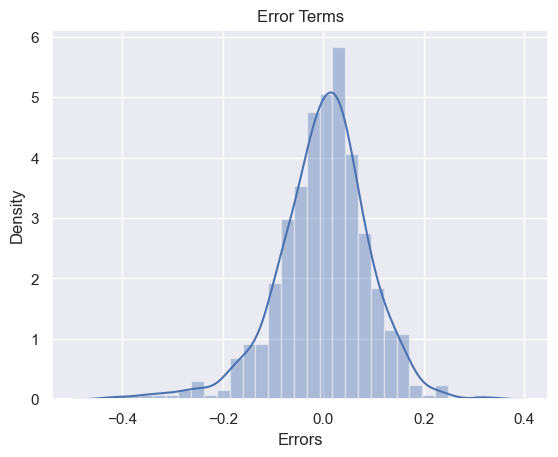

In [60]:
# Plot the histogram of the error terms
sns.distplot(y_train - y_train_pred)
plt.title('Error Terms')                  
plt.xlabel('Errors')  
plt.show()

__Observation:__ Errors are normally distributed and mean is zero.

#### 7.2 Checking error terms are dependent or independent

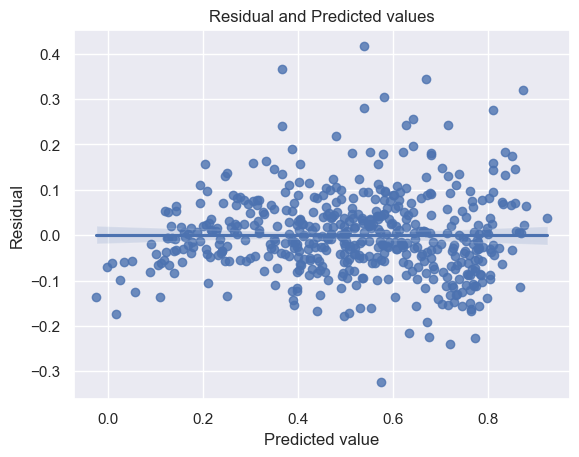

In [61]:
residual= y_train_pred - y_train 
sns.regplot(x= y_train_pred, y=residual)
plt.title("Residual and Predicted values")
plt.xlabel("Predicted value")
plt.ylabel("Residual")
plt.show()

__Observation:__ There is no particular relationship between residual and predicted value. So, model seems to be perfect. 

#### 7.4 Multicollinearity

In [62]:
print_vif(rfe_cols)

           Features   VIF
9              temp  3.73
2         windspeed  3.09
0                yr  2.01
4     season_summer  1.57
8   weathersit_mist  1.48
5     season_winter  1.39
3          mnth_Sep  1.21
6    weekday_Sunday  1.16
7  weathersit_light  1.08
1           holiday  1.04


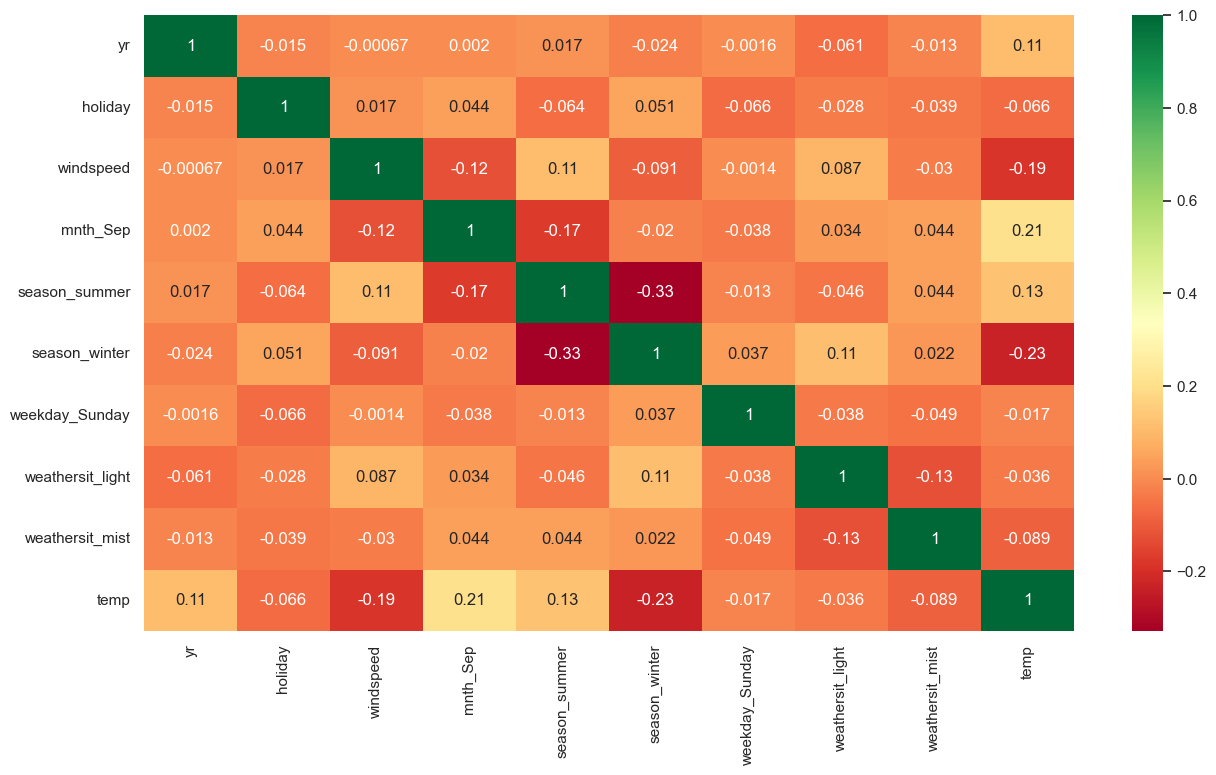

In [63]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="RdYlGn")
plt.show()

VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

#### 7.4 homoscedasticity of error terms 

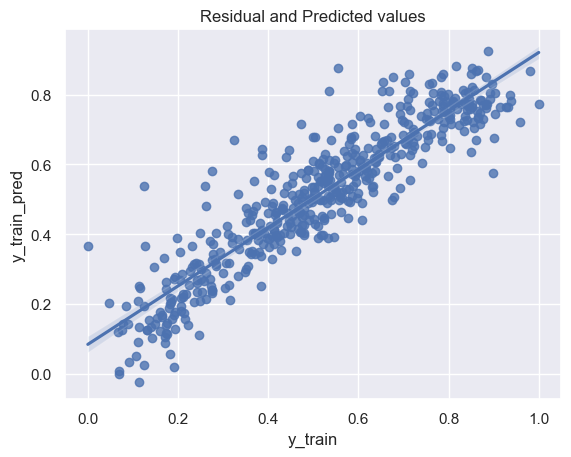

In [64]:
sns.regplot(x= y_train, y=y_train_pred)
plt.title("Residual and Predicted values")
plt.xlabel("y_train")
plt.ylabel("y_train_pred")
plt.show()

there is equal variance of predicted value. There is no particular high concentration of data points and is constant across prediction, means there is homoscedasticity of error terms.

### 8. Making Predictions Using the Final Model

In [65]:
numeric_cols =['temp','atemp','hum','windspeed','cnt']
df_test[numeric_cols] = scaler.transform(df_test[numeric_cols])

In [66]:
y_test = df_test.pop('cnt')
X_test = df_test

In [67]:
# dataframe of selected features 
print(rfe_cols)
#rfe_cols = ['yr', 'holiday', 'windspeed',  'mnth_Sep', 
#       'season_summer', 'season_winter', 'weekday_Sunday', 'weathersit_light',
#       'weathersit_mist','temp']
X_test_sm = X_test[rfe_cols]

Index(['yr', 'holiday', 'windspeed', 'mnth_Sep', 'season_summer',
       'season_winter', 'weekday_Sunday', 'weathersit_light',
       'weathersit_mist', 'temp'],
      dtype='object')


In [68]:
# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test_sm)

In [69]:
#predicting test values
y_pred = lr_model.predict(X_test_sm)

### 9. Model Evaluation

Let's now plot the graph for actual versus predicted values.

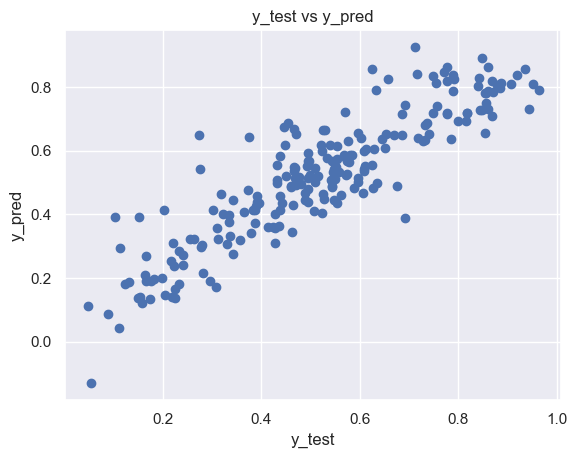

In [70]:
plt.scatter(y_test, y_pred)
plt.title('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred')
plt.show()

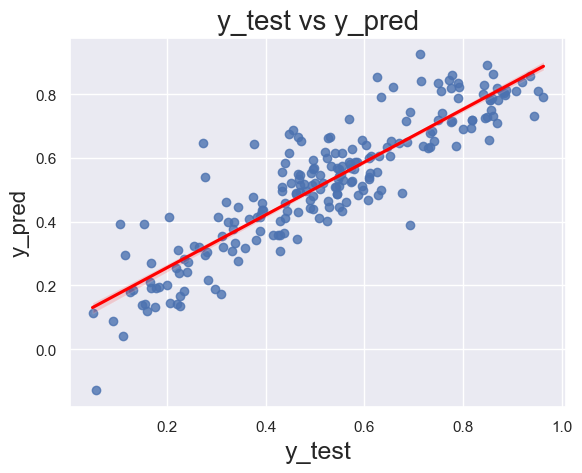

In [71]:
# Visualizing the fit on the test data
# plotting a Regression plot
plt.figure()
y_pred = y_pred.astype(float)
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [72]:
r2_train = r2_score(y_train, y_train_pred)
print('R^2 score on train data ', round(r2_train, 4))# - y_train 

R^2 score on train data  0.8364


In [73]:
r2_test = r2_score(y_test, y_pred)
print('R^2 score on test data ', round(r2_test, 4))

R^2 score on test data  0.7959


In [74]:
# Calculating Adjusted-R^2 value for the train dataset
adjusted_r2_train = round(1-(1-r2_train)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1),4)
print('Adjusted-R^2 score on train data ', adjusted_r2_train)

Adjusted-R^2 score on train data  0.8262


In [75]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2_test = round(1-(1-r2_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print('Adjusted-R^2 score on test data ', adjusted_r2_test)

Adjusted-R^2 score on test data  0.7633


### 10. Summary

In [76]:
# Equation for best fitted line is
round(lr_model.params, 4)

const               0.1343
yr                  0.2333
holiday            -0.1072
windspeed          -0.1529
mnth_Sep            0.0991
season_summer       0.0878
season_winter       0.1323
weekday_Sunday     -0.0503
weathersit_light   -0.2890
weathersit_mist    -0.0810
temp                0.5473
dtype: float64

In [77]:
# VIF of significant columns 
print(lr_model.params)
print_vif(rfe_cols)


const               0.134280
yr                  0.233255
holiday            -0.107191
windspeed          -0.152947
mnth_Sep            0.099113
season_summer       0.087771
season_winter       0.132279
weekday_Sunday     -0.050260
weathersit_light   -0.289030
weathersit_mist    -0.081004
temp                0.547312
dtype: float64
           Features   VIF
9              temp  3.73
2         windspeed  3.09
0                yr  2.01
4     season_summer  1.57
8   weathersit_mist  1.48
5     season_winter  1.39
3          mnth_Sep  1.21
6    weekday_Sunday  1.16
7  weathersit_light  1.08
1           holiday  1.04


__Equation for best fitted line is:__

$ cnt = 0.1343 + 0.2333  \times  yr - 0.1072 \times  holiday - 0.1529 \times windspeed + 0.0991 \times mnth Sep + 0.0878 \times season summer + 0.1323 \times season winter - 0.0503 \times weekday Sunday  - 0.2890 \times weathersit light - 0.0810 \times weathersit mist + 0.5473 \times temp $

__Significant variables list based on VIF:__
- `temp`
- `windspeed`
- `yr`
- `season_summer`
- `weathersit_mist`

__Comparision between Training and Testing dataset:__
- Train dataset R^2: 0.8364
- Test dataset R^2: 0.7959
- Train dataset Adjusted R^2: 0.8262     
- Test dataset Adjusted R^2: 0.7633